## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

## Read Car_Sales.csv Data

In [2]:
df = pd.read_csv("Car_sales.csv")

### Shape of Data

In [3]:
df.shape

(157, 16)

## Let's Explore the data

In [4]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Basic information about the dataset and data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Prior to summary statistics, identify missing values or duplicates and drop them.

In [6]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

### Missing values

In [7]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [8]:
mean_year_resale_value = df['__year_resale_value'].mean()
df['__year_resale_value'].fillna(mean_year_resale_value, inplace=True)
mean_price_in_thousands = df['Price_in_thousands'].mean()
df['Price_in_thousands'].fillna(mean_price_in_thousands, inplace=True)

In [9]:
df[['Engine_size', 'Width', 'Length','Power_perf_factor']] = df[['Engine_size', 'Width', 'Length','Power_perf_factor']].fillna(0)


In [10]:
df['Horsepower'] = df['Horsepower'].fillna(method='ffill')
df['Wheelbase'] = df['Wheelbase'].fillna(method='ffill')
df['Curb_weight'] = df['Curb_weight'].fillna(method='ffill')
df['Curb_weight'] = df['Curb_weight'].fillna(method='ffill')

In [11]:
df.dropna(subset=['Fuel_efficiency', 'Fuel_capacity'], inplace=True)

In [12]:
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

## Check Duplicates

In [13]:
df.duplicated().sum()

0

### Keep only numeric columns in a dataframe 

hint: (use function select_dtype)

In [14]:
df_numerical = df.select_dtypes(include=['int', 'float'])
df_numerical

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225000,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,0.000000
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.072975,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,18.072975,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,18.072975,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,18.072975,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


### Summary statistics

In [15]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,52.861273,18.101098,27.443524,3.060390,185.655844,107.441558,71.111039,187.181818,3.380701,17.957792,23.844156,76.458783
std,68.624655,10.131718,14.390577,1.050454,57.005834,7.677049,3.456595,13.435659,0.634316,3.912487,4.282706,25.963168
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,0.000000
25%,13.877000,12.568750,17.953750,2.300000,148.500000,103.000000,68.400000,177.525000,2.969000,15.800000,21.000000,59.090678
50%,28.413500,17.617500,23.099500,3.000000,175.000000,107.000000,70.450000,187.250000,3.341000,17.200000,24.000000,71.514623
75%,67.640000,18.123244,31.956250,3.725000,215.000000,112.200000,73.100000,195.775000,3.822500,19.725000,26.000000,89.421349
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [16]:
df.describe(include='object')

,Manufacturer,Model,Vehicle_type,Latest_Launch
count,154,154,154,154
unique,30,153,2,128
top,Ford,Neon,Passenger,6/27/2012
freq,11,2,114,2


## Distribution

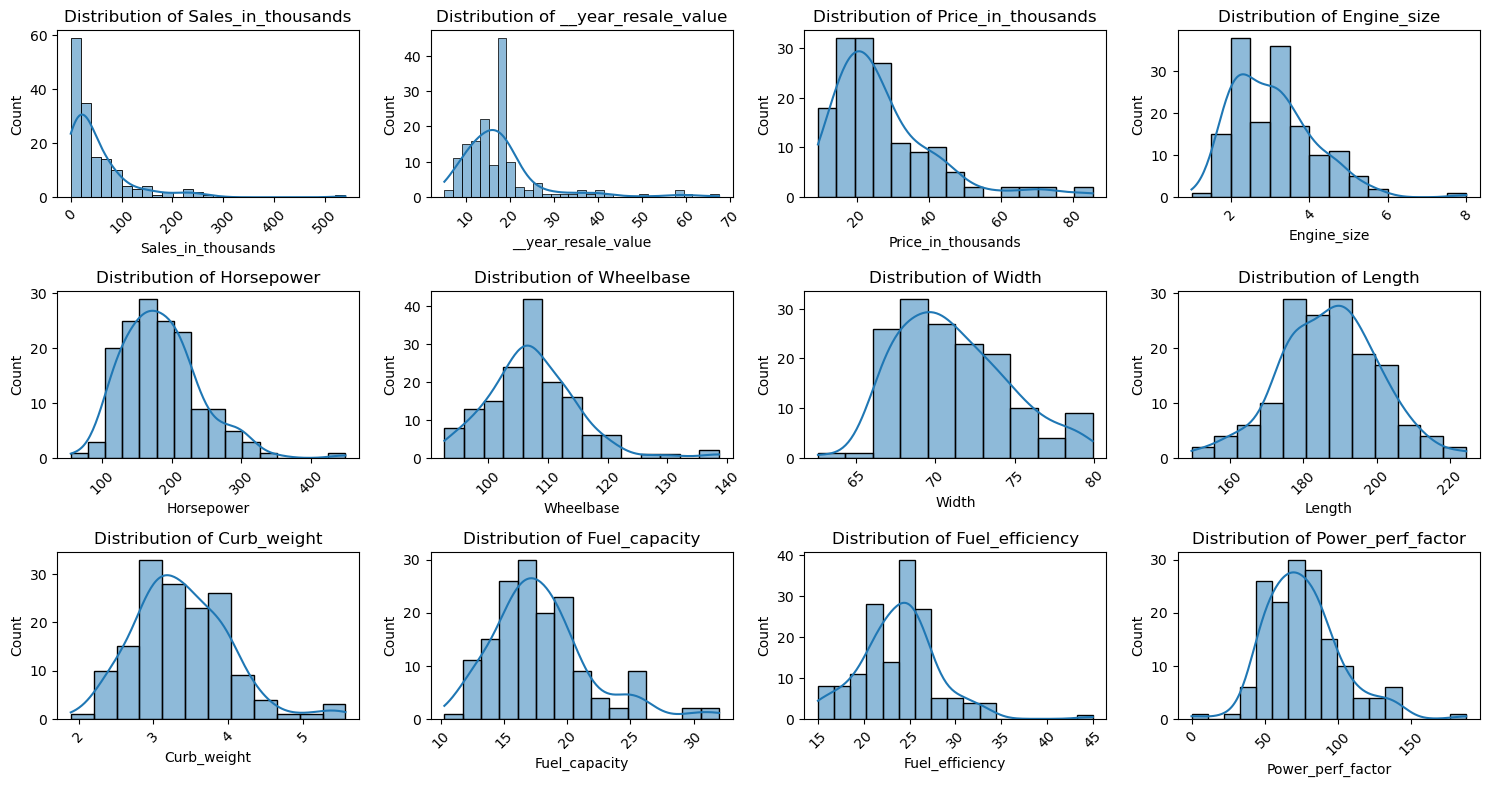

In [17]:
plt.figure(figsize=(15, 10))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(df_numerical.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_numerical[column], kde=True)    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Normalized Distribution (Gaussian)

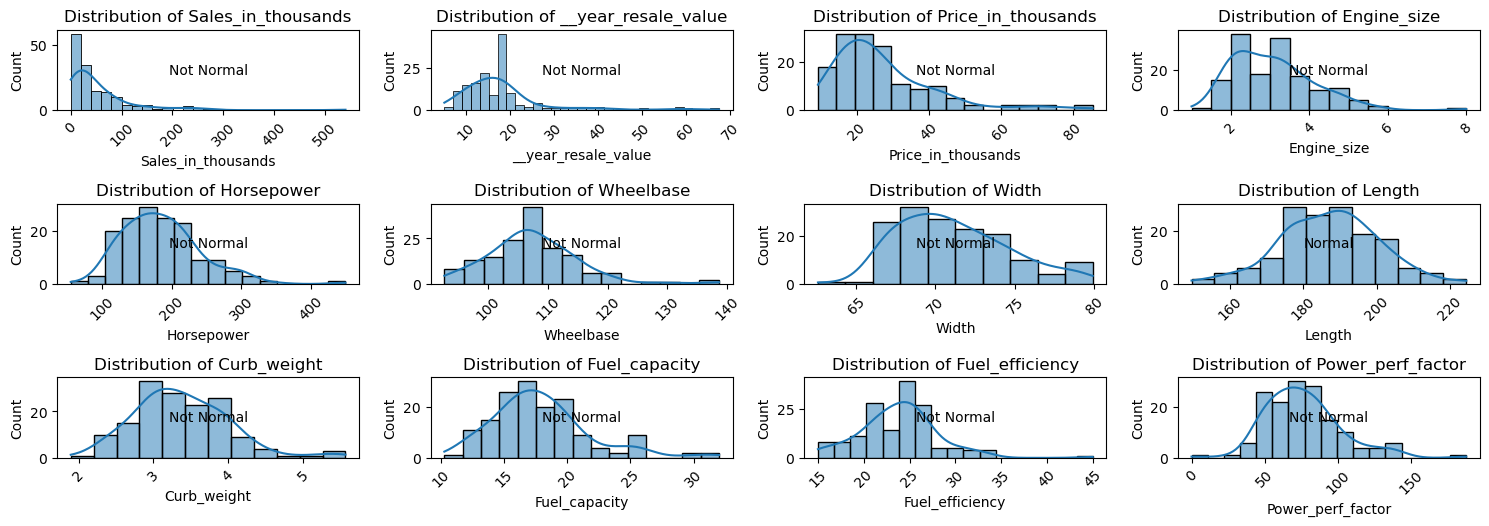

In [18]:
plt.figure(figsize=(15,10))
num_cols = len(df_numerical.columns)
num_rows = (num_cols + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
for i, column in enumerate(df_numerical.columns):
    plt.subplot(num_rows,4,i+1)
    sns.histplot(df_numerical[column],kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Add additional analysis to detect distribution type
    # Check for normal distribution
    K2,p=stats.normaltest(df_numerical[column])
    if p<0.05:
        plt.text(0.5,0.5,'Not Normal',horizontalalignment='center',verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5,0.5,'Normal',horizontalalignment='center',verticalalignment='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

## Skewed Distribution (negative and positive)


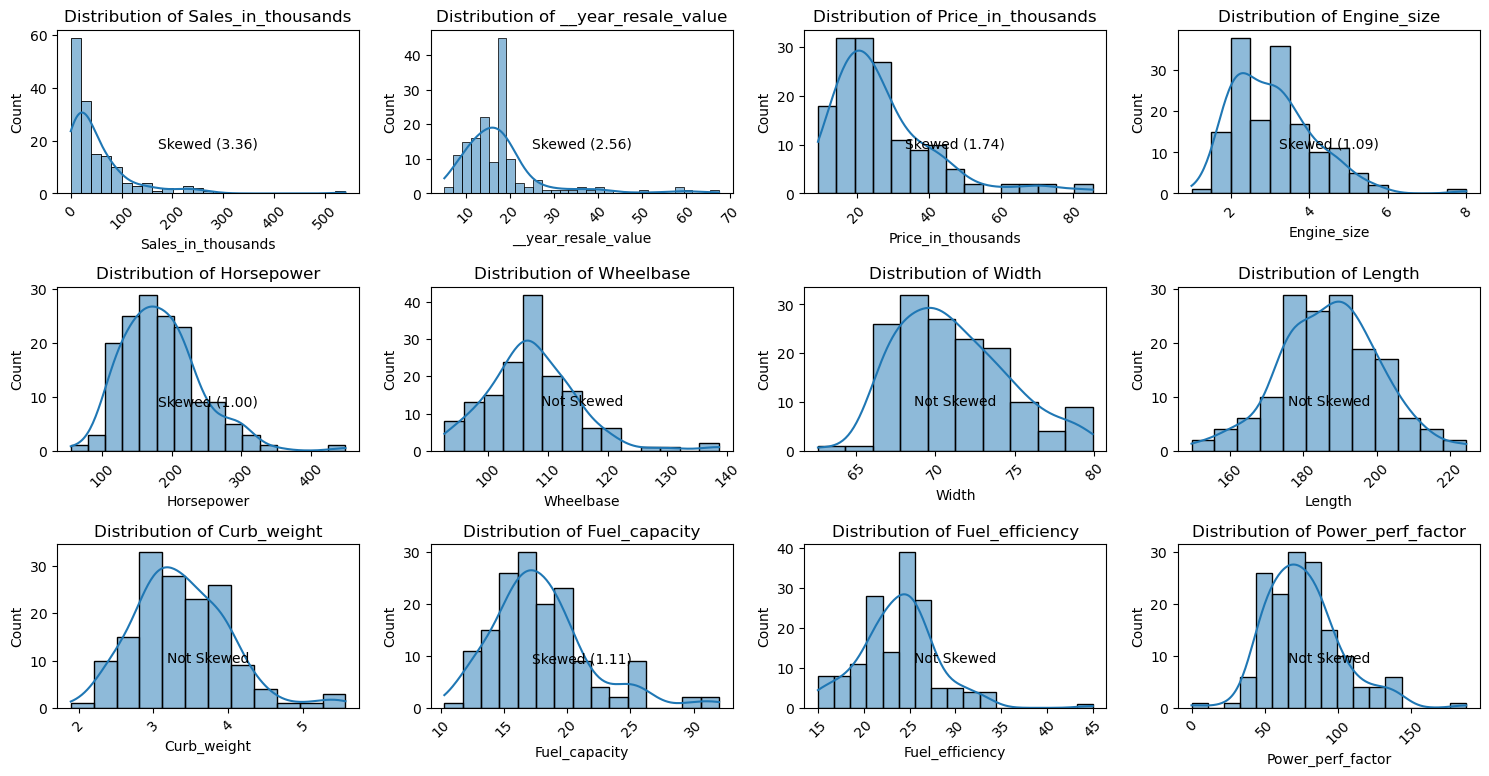

In [19]:
plt.figure(figsize=(15,15))
num_cols = len(df_numerical.columns)
num_rows = (num_cols + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
for i, column in enumerate(df_numerical.columns):
    plt.subplot(num_rows,4,i+1)
    sns.histplot(df_numerical[column],kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

#Check the skewness
    skewness=stats.skew(df_numerical[column])
    if skewness <-1 or  skewness> 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()
    

## Outliers

Plot Boxplot

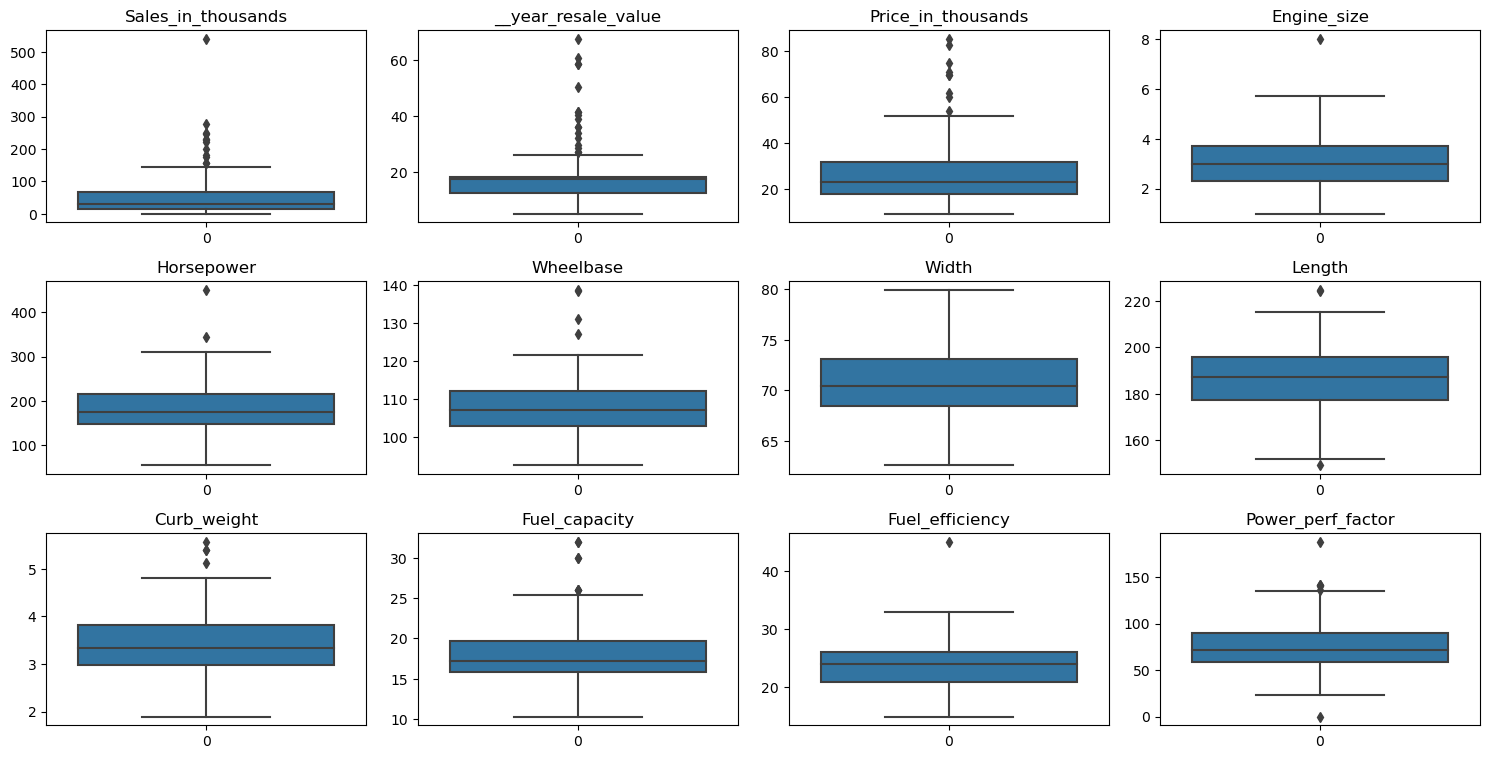

In [20]:
plt.figure(figsize=(15,15))

num_cols = len(df_numerical.columns)
num_rows = (num_cols + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
for i, column in enumerate(df_numerical.columns):
    plt.subplot(num_rows,4,i+1)
    sns.boxplot(df_numerical[column])
    plt.title(column)
plt.tight_layout()
plt.show()
      

## Z-score

Detect Outliers using Z-Score. (Set threshold =3)

In [21]:
from scipy.stats import zscore

z_scores = zscore(df_numerical)

# Set threshold for Z-score (3)
threshold = 3

# Detect outliers for each numeric column
outliers = (abs(z_scores) > threshold).any(axis=1)

# Print indices of rows containing outliers
outlier_indices = df_numerical.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)



Index of rows with outliers: [18, 26, 39, 40, 41, 42, 43, 52, 56, 74, 78, 94, 95, 99, 125, 126]


In [22]:
print("Count of outliers:", len(outlier_indices))

Count of outliers: 16


In [23]:
z_scores = df_numerical.apply(zscore)

threshold = 3

# Detect outliers in each column
outliers = (abs(z_scores) > threshold)
# Print outliers for each column
for column in outliers.columns:
    column_outliers = outliers[column]
    if column_outliers.any():
        print(f"Outliers in column '{column}':")
        print(df_numerical[column][column_outliers].tolist())
    else:
        print(f"No outliers in column '{column}'")

Outliers in column 'Sales_in_thousands':
[276.747, 540.561]
Outliers in column '__year_resale_value':
[58.47, 50.375, 58.6, 60.625, 67.55]
Outliers in column 'Price_in_thousands':
[82.6, 85.5, 71.02, 74.97]
Outliers in column 'Engine_size':
[8.0]
Outliers in column 'Horsepower':
[450.0]
Outliers in column 'Wheelbase':
[138.7, 131.0, 138.5]
No outliers in column 'Width'
No outliers in column 'Length'
Outliers in column 'Curb_weight':
[5.572, 5.401, 5.393]
Outliers in column 'Fuel_capacity':
[30.0, 32.0, 32.0, 30.0]
Outliers in column 'Fuel_efficiency':
[45.0]
Outliers in column 'Power_perf_factor':
[188.144323]


## Remove outliers

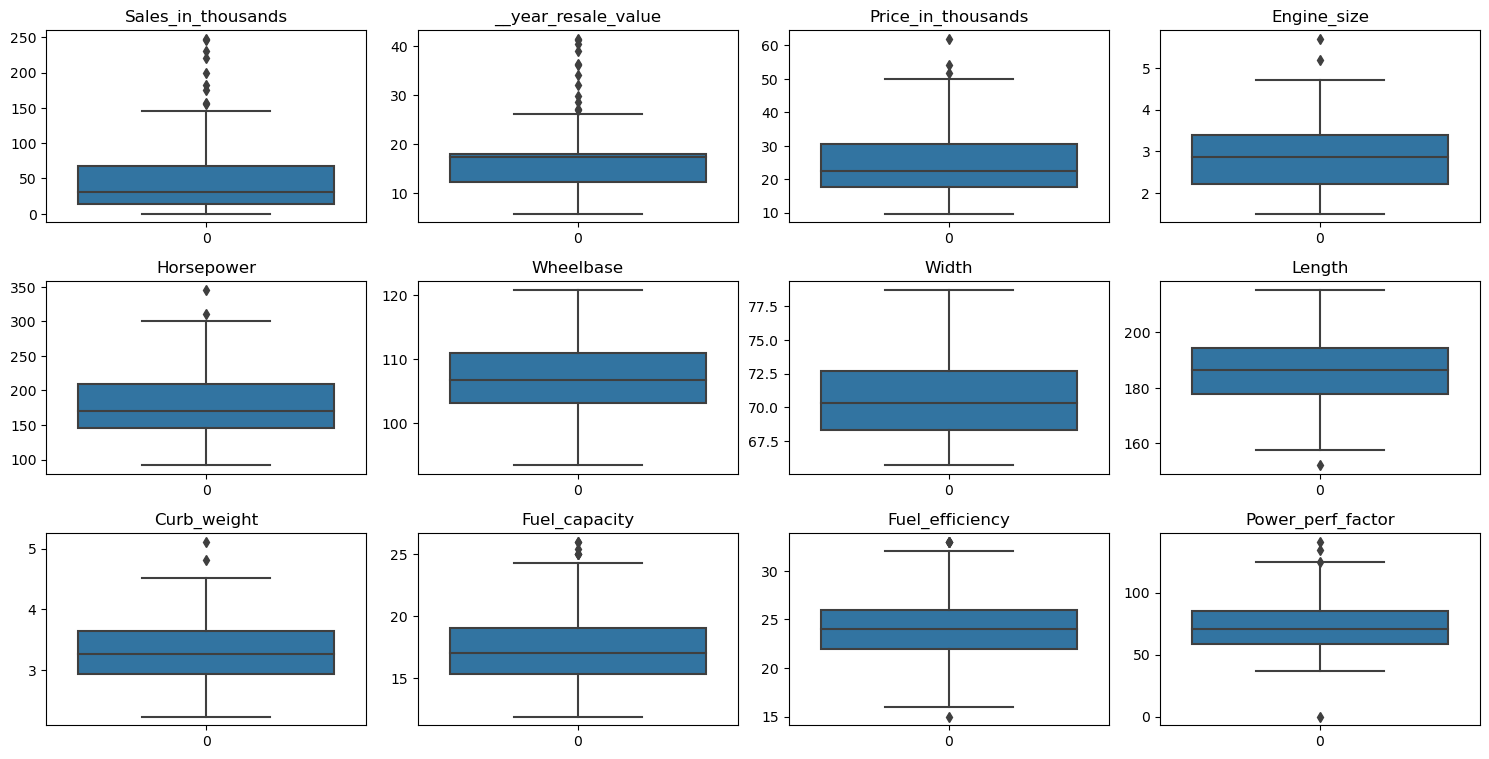

In [24]:
z_scores = zscore(df_numerical)

# Set threshold for Z-score (e.g., 3)
z_threshold = 3

# Remove rows with outliers based on Z-score
df_numerical= df_numerical[(abs(z_scores) < z_threshold).all(axis=1)]

num_cols = len(df_numerical.columns)
num_rows = (num_cols + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
plt.figure(figsize=(15, 15))
for i, column in enumerate(df_numerical.columns):
    plt.subplot(num_rows,4,i+1)
    sns.boxplot(df_numerical[column])
    plt.title(column)
plt.tight_layout()
plt.show()
      


## Distribution Check

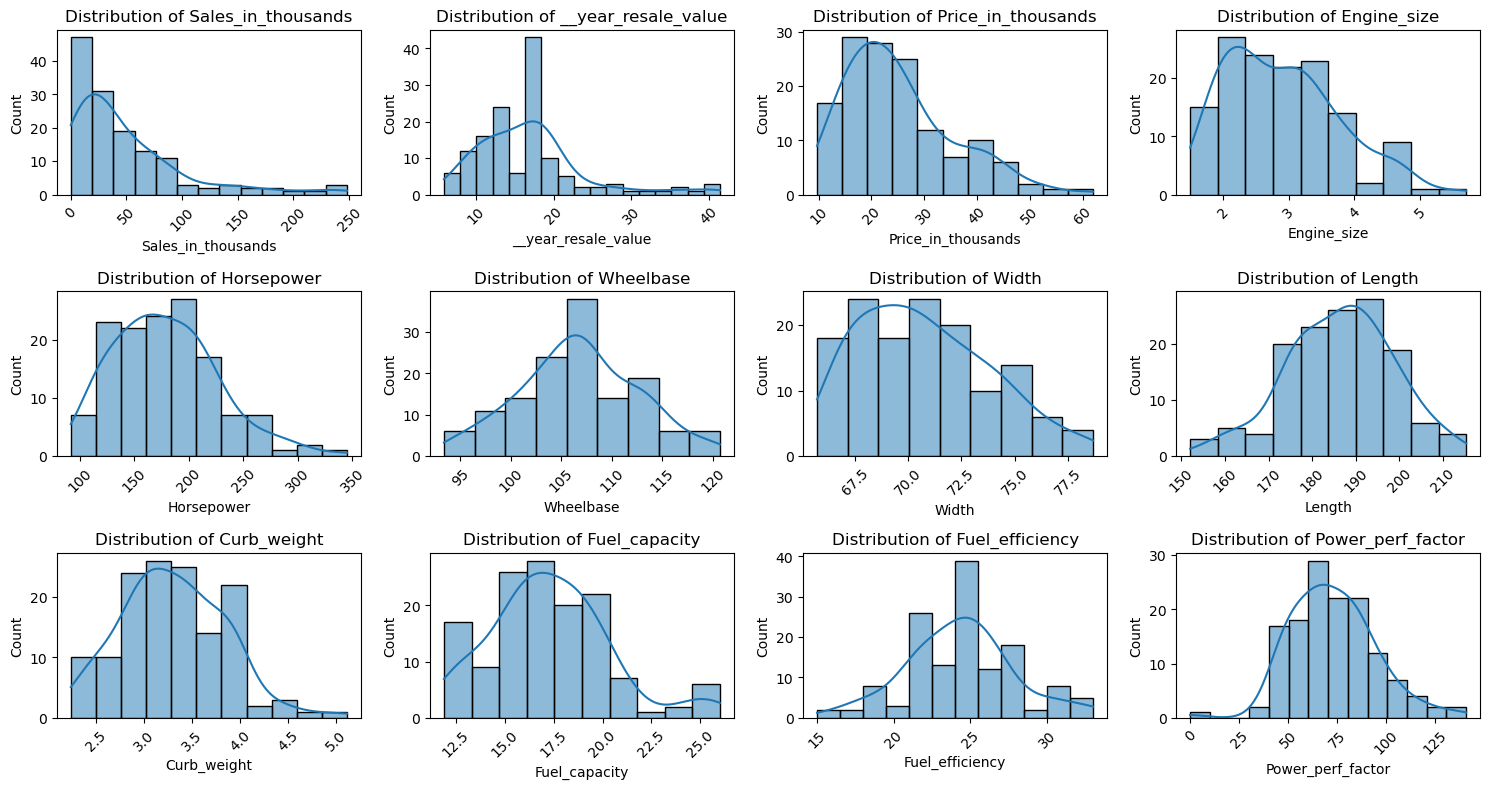

In [25]:
plt.figure(figsize=(15, 10))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(df_numerical.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_numerical[column], kde=True)    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### Use binning technique to remove Skewness 

In [26]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

## Distribution check
To confirm if skewness is removed or not

In [28]:
df['Sales_in_thousands'].value_counts()

Sales_in_thousands
16.919     1
65.005     1
28.976     1
42.643     1
88.094     1
          ..
125.338    1
220.650    1
540.561    1
199.685    1
18.969     1
Name: count, Length: 154, dtype: int64

In [31]:
df['__year_resale_value'].value_counts()

__year_resale_value
18.072975    35
7.750000      2
18.225000     2
16.575000     2
12.025000     2
             ..
13.425000     1
15.510000     1
15.060000     1
58.470000     1
13.760000     1
Name: count, Length: 116, dtype: int64

In [32]:
df['Price_in_thousands'].value_counts()

Price_in_thousands
12.640    2
38.900    2
18.890    2
21.500    1
18.145    1
         ..
12.050    1
26.935    1
12.885    1
15.350    1
36.000    1
Name: count, Length: 151, dtype: int64

In [38]:
df_numerical['Bin_Sales_in_thousands']=pd.qcut(df_numerical['Sales_in_thousands'], q=75, labels=False)
df_numerical['Bin___year_resale_value']=pd.qcut(df_numerical['__year_resale_value'], q=58, labels=False,duplicates='drop')
df_numerical['Bin_Price_in_thousands']=pd.qcut(df_numerical['Price_in_thousands'], q=58, labels=False,duplicates='drop')

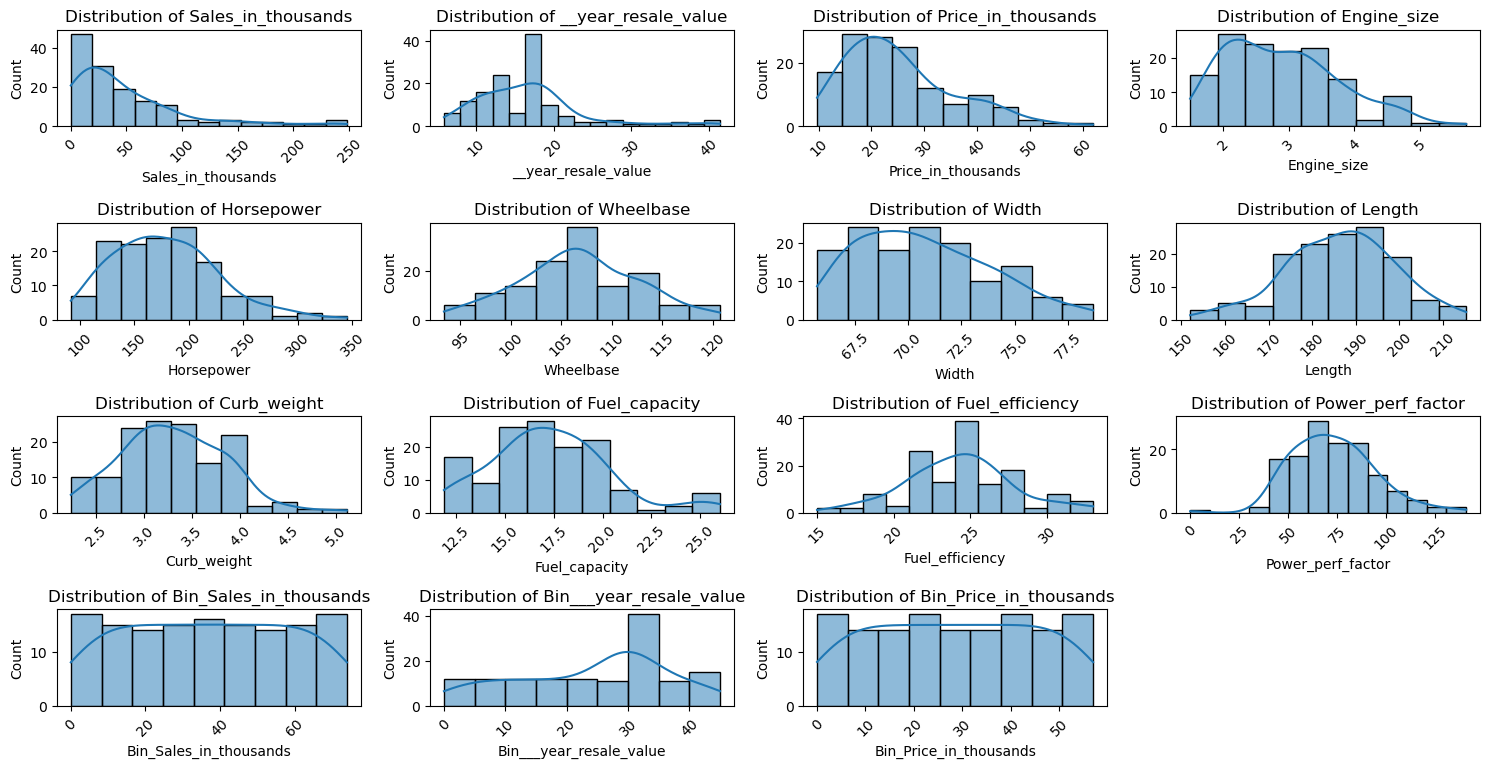

In [39]:
num_cols = len(df_numerical.columns)
num_rows = (num_cols + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
plt.figure(figsize=(15, 15))
for i, column in enumerate(df_numerical.columns):
    plt.subplot(num_rows,4,i+1)
    sns.histplot(df_numerical[column], kde=True)    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [44]:
df_numerical.drop(["Sales_in_thousands","__year_resale_value",'Price_in_thousands'],axis=1,inplace=True) 
#Drop the skewed columns

In [45]:
df_numerical.columns

Index(['Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Bin_Sales_in_thousands', 'Bin___year_resale_value',
       'Bin_Price_in_thousands'],
      dtype='object')

### Standardization and Normalization

Apply standardization and normalization on the columns

In [48]:
from sklearn.preprocessing import StandardScaler

In [60]:
from sklearn.preprocessing import MinMaxScaler

## Standardization

In [49]:
numerical_columns = df_numerical.columns.tolist()
scaler = StandardScaler()
df_numerical_standardized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_columns)

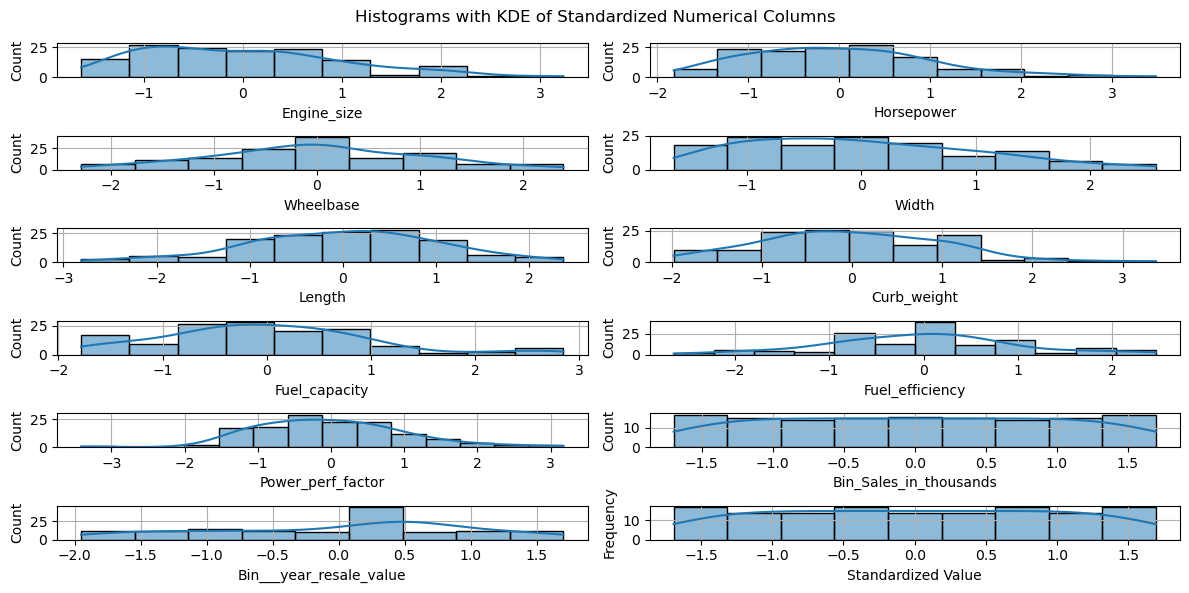

In [58]:
num_cols = len(df_numerical_standardized.columns)
num_rows = (num_cols + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_numerical_standardized.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(df_numerical_standardized[column], kde=True)
    plt.grid(True)

plt.suptitle("Histograms with KDE of Standardized Numerical Columns")
plt.xlabel("Standardized Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Normalization

In [61]:
numerical_columns = df_numerical.columns.tolist()
Normalization = MinMaxScaler()
df_numerical_normalization = pd.DataFrame(Normalization.fit_transform(df_numerical), columns=numerical_columns)

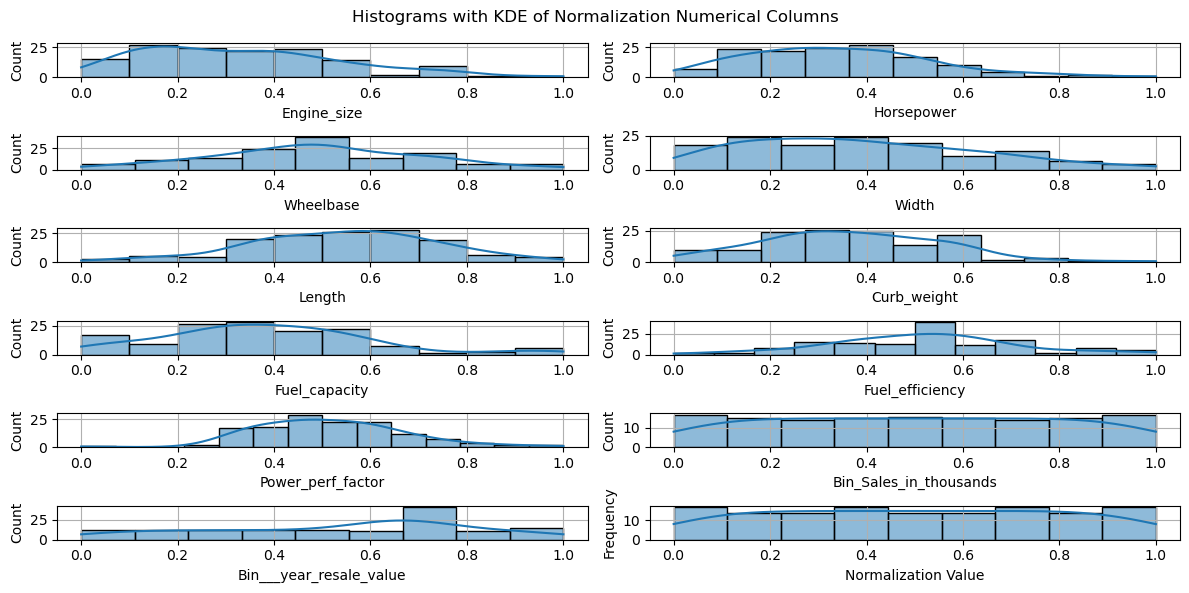

In [65]:
num_cols = len(df_numerical_normalization.columns)
num_rows = (num_cols + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_numerical_normalization.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(df_numerical_normalization[column], kde=True)
    plt.grid(True)

plt.suptitle("Histograms with KDE of Normalization Numerical Columns")
plt.xlabel("Normalization Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Distribution check

In [77]:
# Concatenate the standardized and normalized columns back to the original DataFrame df
df_combined = pd.concat([df_numerical.drop(columns=numerical_columns), df_numerical_standardized, df_numerical_normalization], axis=1)


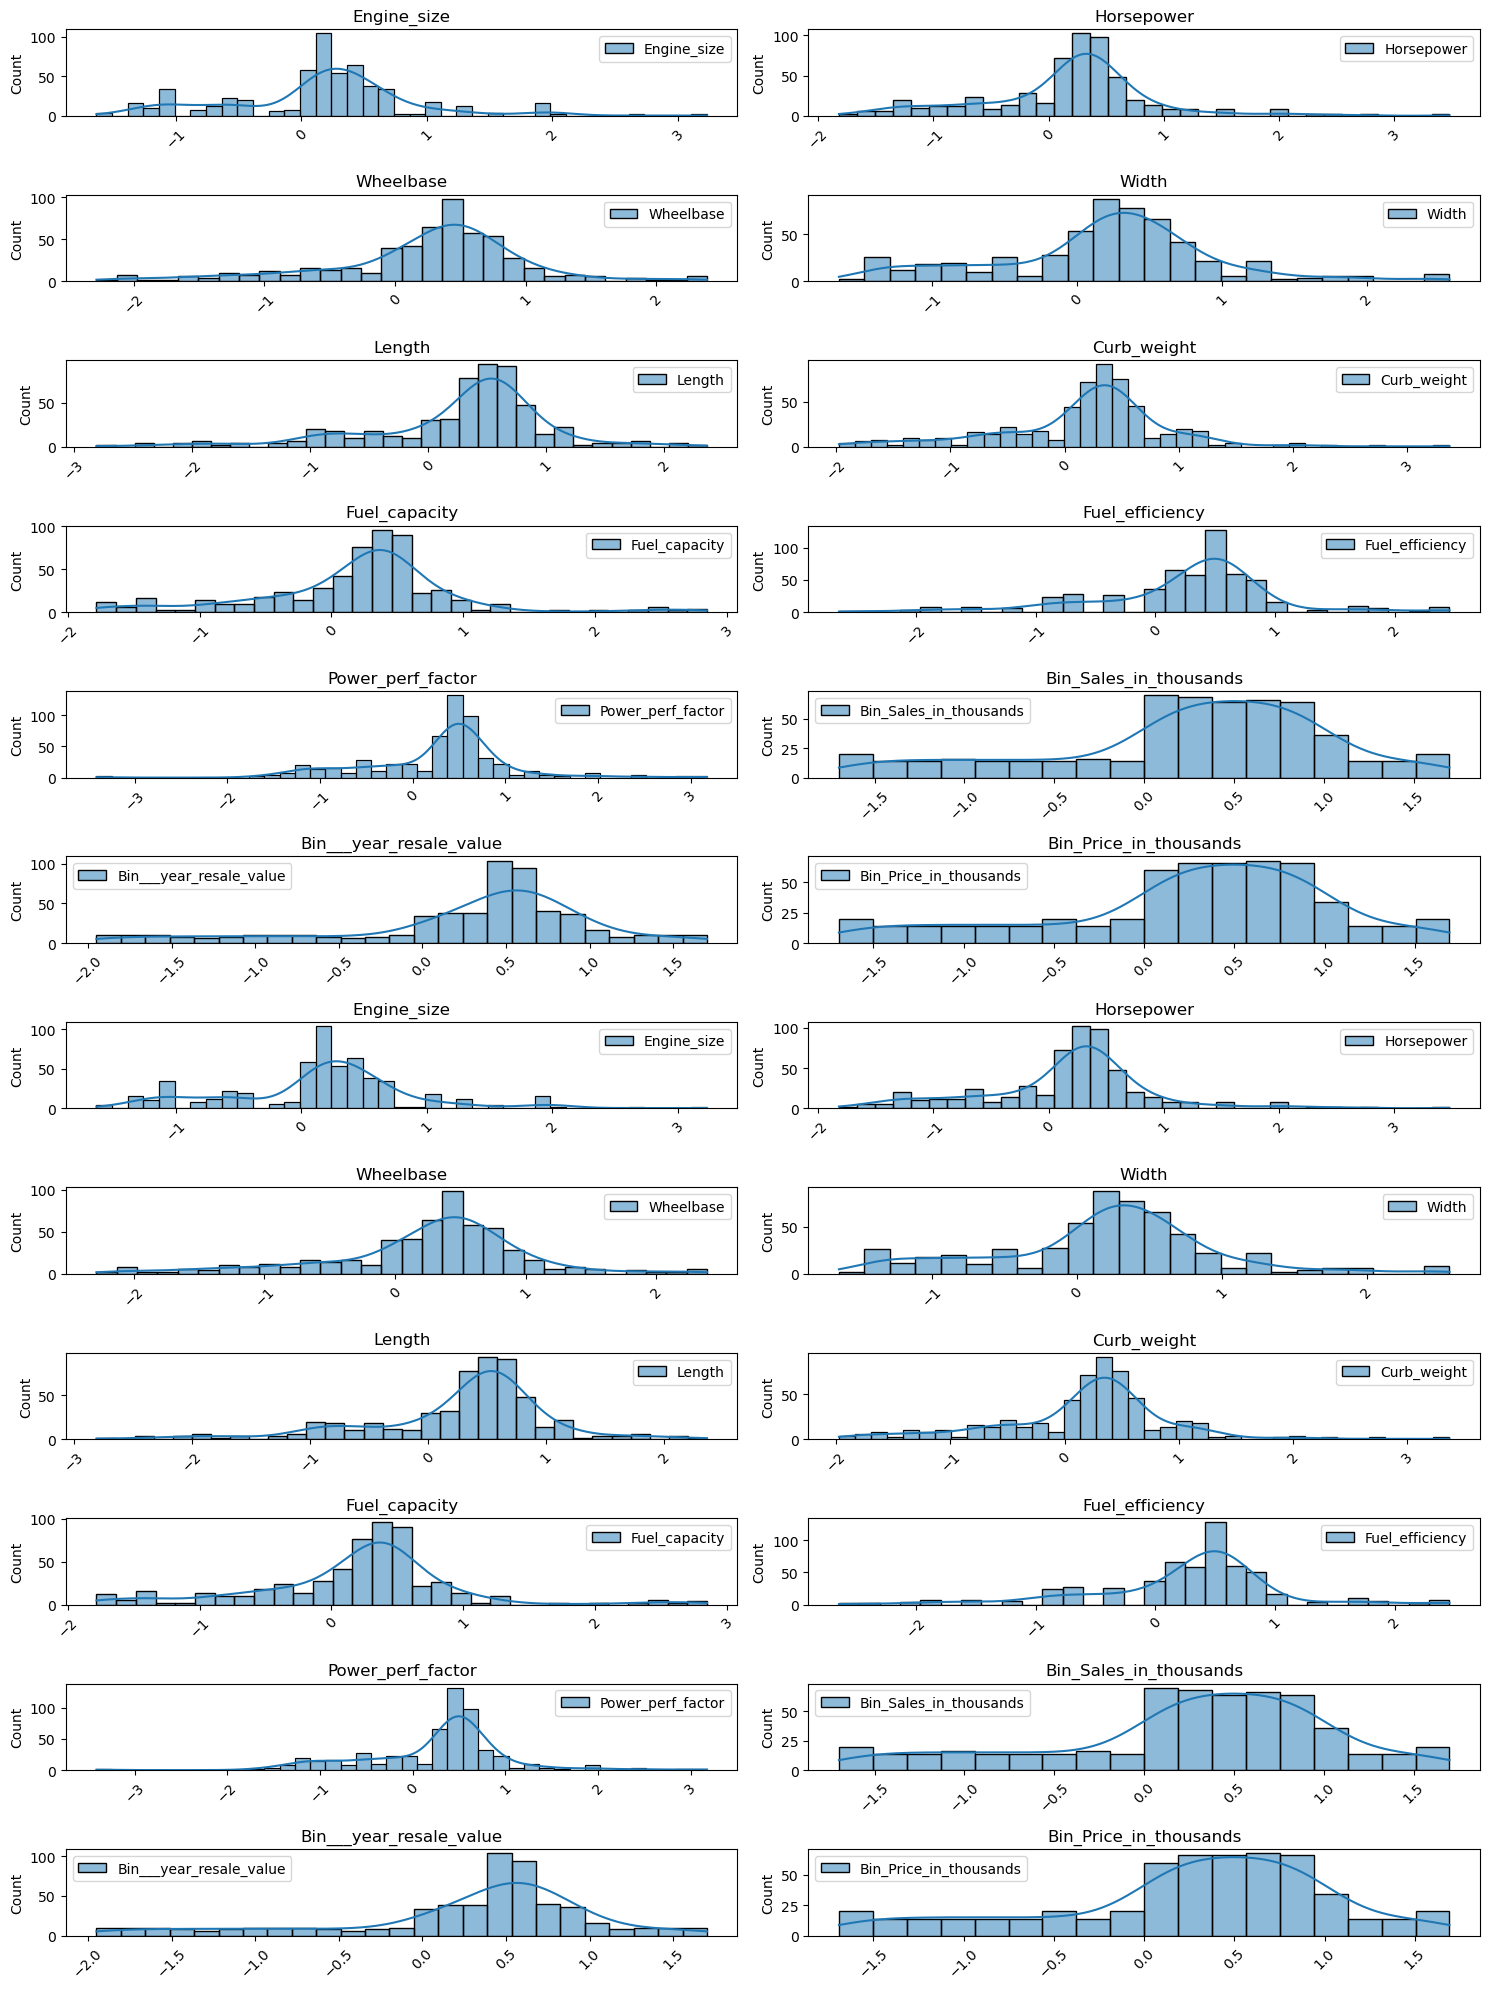

In [78]:
num_cols = len(df_combined.columns)
num_rows = (num_cols + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
plt.figure(figsize=(15, 20))
for i, column in enumerate(df_combined.columns):
    plt.subplot(num_rows,2,i+1)
    sns.histplot(df_combined[column], kde=True)    
    plt.title(column)
    plt.xticks(rotation=45)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## The END!